In [1]:
import sys
import os

import numpy as np

import pyAgrum as gum

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC

In [2]:
bn=gum.loadBN(os.path.join("res","alarm.dsl"))

In [3]:
gum.generateCSV(bn,os.path.join("out","learn.csv"),10000,visible=True,with_labels=True)
print()
gum.generateCSV(bn,os.path.join("out","train.csv"),1000,visible=True,with_labels=True)

 out/learn.csv : [ ########################################################### ] 100%
Log2-Likelihood : -151505.93230433654

 out/train.csv : [ ########################################################### ] 100%ut/train.csv : [ ############################################                ] 75%
Log2-Likelihood : -15464.898049240976


-15464.898049240976

# Learning a BN from learn.csv

In [4]:
# Learning a BN from the database
learner=gum.BNLearner(os.path.join("out","train.csv"))

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

In [5]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn2,size="8",format="svg")

In [6]:
print(bn2.names())

['ERRCAUTER', 'PAP', 'INTUBATION', 'CVP', 'ARTCO2', 'VENTTUBE', 'HR', 'VENTLUNG', 'MINVOLSET', 'SAO2', 'HREKG', 'HRSAT', 'PCWP', 'HYPOVOLEMIA', 'HISTORY', 'EXPCO2', 'VENTALV', 'SHUNT', 'ERRLOWOUTPUT', 'TPR', 'INSUFFANESTH', 'FIO2', 'LVEDVOLUME', 'LVFAILURE', 'MINVOL', 'KINKEDTUBE', 'VENTMACH', 'PRESS', 'PVSAT', 'CATECHOL', 'HRBP', 'PULMEMBOLUS', 'DISCONNECT', 'CO', 'ANAPHYLAXIS', 'STROKEVOLUME', 'BP']


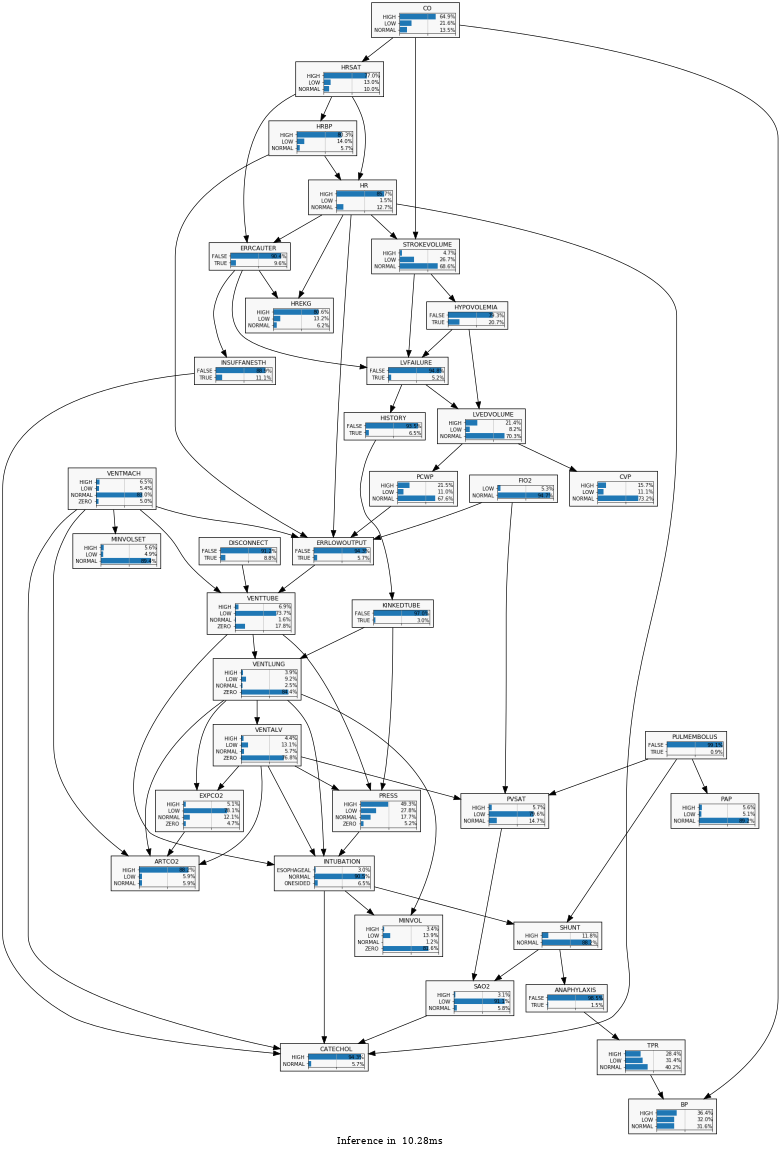

In [7]:
gnb.showInference(bn2,evs={},size="12")

# Two classifiers from the learned BN

In [8]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT<HIGH,LOW,NORMAL>
INTUBATION<ESOPHAGEAL,NORMAL,ONESIDED>



 result in out/train.csv-ROC_Learned_0.146137504s-HRSAT-LOW.png


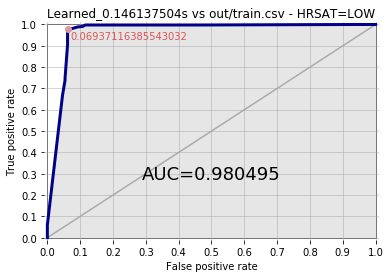

In [9]:
showROC(bn2,os.path.join("out","train.csv"),'HRSAT','LOW',visible=False) 


 result in out/train.csv-ROC_Learned_0.146137504s-INTUBATION-NORMAL.png


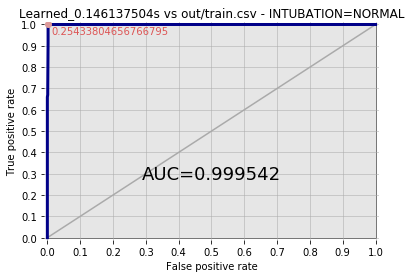

In [10]:
showROC(bn2,os.path.join("out","train.csv"),'INTUBATION',"NORMAL",visible=False) 